# Life Expectancy (WHO)
#### Regression Models for predicting Life Expectancy according to WHO dataset.

### Context
Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

### Content
The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

### Acknowledgements
The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

- Inspiration
- The data-set aims to answer the following key questions:

- Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?

- Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

- How does Infant and Adult mortality rates affect life expectancy?

- Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

- What is the impact of schooling on the lifespan of humans?

- Does Life Expectancy have positive or negative relationship with drinking alcohol?

- Do densely populated countries tend to have lower life expectancy?

- What is the impact of Immunization coverage on life Expectancy?

# 1. Importing Ml Libraries & Dataset

In [1]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import datetime
import math

# librabries for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# libraries for ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV,Lasso,LassoCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor

# libraries for model evaluation
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

# libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# visualization
from yellowbrick.regressor import residuals_plot,prediction_error

# to ignore warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set_style("whitegrid")

### Importing data

In [2]:
df = pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.shape

(2938, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# 2. Data Cleaning
## 2.1 Null Values

In [5]:
# Function to find out missing values
def check_na(data):
    missing_values= data.isna().sum().reset_index()
    missing_values.columns= ["Features", "Missing_Values"]
    missing_values["Missing_Percent"]= round(missing_values.Missing_Values/len(data)*100,2)
    missing_values = missing_values[missing_values.Missing_Values > 0 ]

    return missing_values.sort_values("Missing_Percent", ascending=False).reset_index(drop=True)

In [6]:
# List of Null value features
missing_values = check_na(df)
missing_values

,Features,Missing_Values,Missing_Percent
0,Population,652,22.19
1,Hepatitis B,553,18.82
2,GDP,448,15.25
3,Total expenditure,226,7.69
4,Alcohol,194,6.60
5,Income composition of resources,167,5.68
6,Schooling,163,5.55
7,BMI,34,1.16
8,thinness 1-19 years,34,1.16
9,thinness 5-9 years,34,1.16


In [7]:
# Function to impute null/missing values with Mean, Median, Mode
def missing_value_imputer(data, feature, method):
    if method == "mode":
        data[feature] = data[feature].fillna(data[feature].mode()[0])
    elif method == "median":
        data[feature] = data[feature].fillna(data[feature].median())
    else:
        data[feature] = data[feature].fillna(data[feature].mean())
    return data

In [8]:
# Imputing the missing values for each column having missing values
for feature in missing_values["Features"]:
    missing_value_imputer(data= df, feature=feature, method="median")

In [9]:
# Check missing values
missing_values = check_na(df)
missing_values

,Features,Missing_Values,Missing_Percent


#### We have imputed the missing values with median of respective features with the help of missing_value_imputer() function 

## 2.2 Categorical and Numerical Data

In [10]:
# Finding out which features have categorical values and which one of them have numerical values.
categorical = df.select_dtypes(include="O")
numerical = df.select_dtypes(exclude="O")

In [11]:
categorical

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [12]:
# Label encoding the categorical features 
columns = categorical.columns
def label_enoder(data, columns):
    for feature in columns:
        le = LabelEncoder()
        data[feature]= le.fit_transform(data[feature])
        data[feature].astype("int64")
    return data

In [13]:
df = label_enoder(df, categorical.columns)
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


# 3. Feature Engineering

### Correlation matrix
Finding the feature correlation from heatmap to see which two features are highly correlated, so that unnecessary features could be deleted.

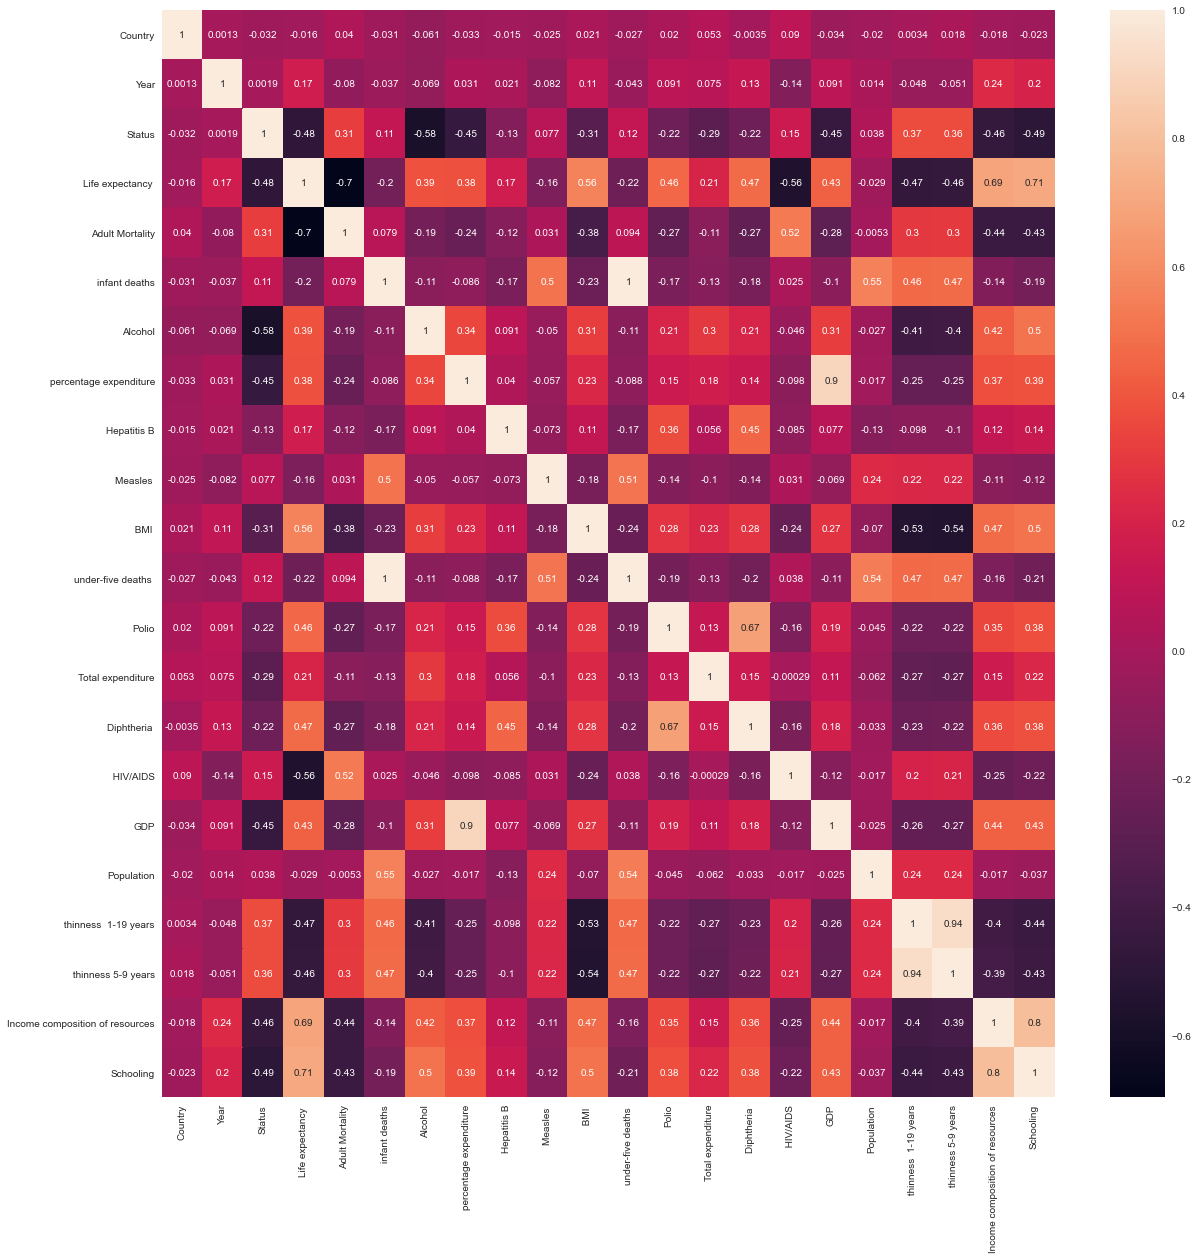

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
# Function to find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [16]:
droppable_features = list(correlation(df, 0.8))
droppable_features

[' thinness 5-9 years', 'GDP', 'under-five deaths ']

In [17]:
df.drop(droppable_features, axis=1, inplace=True)

Here, we dropped the features which are highly correlated to another feature hence does not give cause information gain, so we can delete them to reduce dimensionality.

correlation() function returns the columns which cn be dropped as they are having correlation higher than given threshold value

### Feature Selection

In [18]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,Population,thinness 1-19 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,33736494.0,17.2,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,327582.0,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,31731688.0,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,3696958.0,17.9,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,2978599.0,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,192,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,7.13,65.0,33.6,12777511.0,9.4,0.407,9.2
2934,192,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,6.52,68.0,36.7,12633897.0,9.8,0.418,9.5
2935,192,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,6.53,71.0,39.8,125525.0,1.2,0.427,10.0
2936,192,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,6.16,75.0,42.1,12366165.0,1.6,0.427,9.8


In [19]:
from sklearn.feature_selection import mutual_info_regression

x = df.drop(["Life expectancy "], axis=1)
y = df["Life expectancy "]

# Function to get the features and their mutual information gain for regression
def select_features_mutual_info_regression(x, y):
    mutual_info = mutual_info_regression(x,y)
    mutual_data=pd.Series(mutual_info,index = x.columns)
    return mutual_data.sort_values(ascending=False)

top_features = select_features_mutual_info_regression(x, y)
top_features

Adult Mortality                    1.275770
Income composition of resources    0.914163
 thinness  1-19 years              0.783828
Schooling                          0.680602
Country                            0.609762
 BMI                               0.572901
 HIV/AIDS                          0.526334
infant deaths                      0.419839
Alcohol                            0.343178
Polio                              0.326136
Diphtheria                         0.300600
percentage expenditure             0.293535
Total expenditure                  0.261071
Hepatitis B                        0.201145
Status                             0.200701
Population                         0.162328
Measles                            0.107449
Year                               0.077497
dtype: float64

In [20]:
# Selecting top 15 features with highest mutual information gain
top_features = top_features.head(15)
top_features

Adult Mortality                    1.275770
Income composition of resources    0.914163
 thinness  1-19 years              0.783828
Schooling                          0.680602
Country                            0.609762
 BMI                               0.572901
 HIV/AIDS                          0.526334
infant deaths                      0.419839
Alcohol                            0.343178
Polio                              0.326136
Diphtheria                         0.300600
percentage expenditure             0.293535
Total expenditure                  0.261071
Hepatitis B                        0.201145
Status                             0.200701
dtype: float64

### Splitting Data into Features and Target

In [21]:
# Splitting data into Features
x = df[top_features.index]
x

,Adult Mortality,Income composition of resources,thinness 1-19 years,Schooling,Country,BMI,HIV/AIDS,infant deaths,Alcohol,Polio,Diphtheria,percentage expenditure,Total expenditure,Hepatitis B,Status
0,263.0,0.479,17.2,10.1,0,19.1,0.1,62,0.01,6.0,65.0,71.279624,8.16,65.0,1
1,271.0,0.476,17.5,10.0,0,18.6,0.1,64,0.01,58.0,62.0,73.523582,8.18,62.0,1
2,268.0,0.470,17.7,9.9,0,18.1,0.1,66,0.01,62.0,64.0,73.219243,8.13,64.0,1
3,272.0,0.463,17.9,9.8,0,17.6,0.1,69,0.01,67.0,67.0,78.184215,8.52,67.0,1
4,275.0,0.454,18.2,9.5,0,17.2,0.1,71,0.01,68.0,68.0,7.097109,7.87,68.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,0.407,9.4,9.2,192,27.1,33.6,27,4.36,67.0,65.0,0.000000,7.13,68.0,1
2934,715.0,0.418,9.8,9.5,192,26.7,36.7,26,4.06,7.0,68.0,0.000000,6.52,7.0,1
2935,73.0,0.427,1.2,10.0,192,26.3,39.8,25,4.43,73.0,71.0,0.000000,6.53,73.0,1
2936,686.0,0.427,1.6,9.8,192,25.9,42.1,25,1.72,76.0,75.0,0.000000,6.16,76.0,1


In [22]:
# Splitting data into Target
y = df["Life expectancy "]
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

### Feature Transformation

In [23]:
def scaler_transform(data):
    columns = data.columns
    sc = StandardScaler()
    for i in columns:
        data[[i]] = sc.fit_transform(df[[i]])
        
    return data

In [24]:
x = scaler_transform(x)

# 4. Predictive Model

### Splitting data into Training and Testing Datasets

In [25]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state=0)

In [26]:
# Function to apply Regression algorithms and return the results of models
def predictive_models():
    algorithms = [LinearRegression(), Ridge(alpha=0.1), RidgeCV(alphas=[0.1,0.01,0.001,1],cv=10), Lasso(alpha=0.1), LassoCV(alphas=[0.1,0.01,0.001,1],cv=10), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor(), AdaBoostRegressor(), XGBRegressor(),
                  StackingCVRegressor(regressors=(LinearRegression(), Ridge(alpha=0.1), RidgeCV(alphas=[0.1,0.01,0.001,1],cv=10), Lasso(alpha=0.1), LassoCV(alphas=[0.1,0.01,0.001,1],cv=10), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(), XGBRegressor()),meta_regressor=Ridge(), use_features_in_secondary=True,cv=30)]
    algorithm_names = ["Linear Regression",  "Ridge", "RidgeCV", "Lasso"," LassoCV", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor", "Gradient Boosting Regressor", "Ada-Boost Regressor", "XGB-Regressor","Stacked Regressor"]
    
    # Errors for training data
    Mean_Squared_Error_Training = []
    Mean_Absolute_Error_Training = []
    Accuracy_Training = []
    
    # Errors for testing data
    Mean_Squared_Error_Testing = []
    Mean_Absolute_Error_Testing = []
    Accuracy_Testing = []
    
    # Regression models
    for i in algorithms:
        model = i
        model.fit(x_train,y_train)
    
        y_test_predict = model.predict(x_test)
        y_train_predict = model.predict(x_train)
            
        mse_1 = round(mean_squared_error(y_train, y_train_predict),4)
        mae_1 = round(mean_absolute_error(y_train, y_train_predict),4)
        acc_1 = round((1-mean_absolute_percentage_error(y_train, y_train_predict))*100,4)
        
        mse_2 = round(mean_squared_error(y_test, y_test_predict),4)
        mae_2 = round(mean_absolute_error(y_test, y_test_predict),4)
        acc_2 = round((1-mean_absolute_percentage_error(y_test, y_test_predict))*100,4)
        
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Training.append(mse_1)
        Mean_Absolute_Error_Training.append(mae_1)
        Accuracy_Training.append(acc_1)
                
        # Appending the Errors into the list for training data
        Mean_Squared_Error_Testing.append(mse_2)
        Mean_Absolute_Error_Testing.append(mae_2)
        Accuracy_Testing.append(acc_2)
        
    # Creating DataFrame for Logs of Models and their errors    
    results = pd.DataFrame({"Models":algorithm_names,
                            "Mean Squared Error Training":Mean_Squared_Error_Training,
                            "Mean Absolute Error Training":Mean_Absolute_Error_Training,
                            "Accuracy_Training %":Accuracy_Training,                          
                            "Mean Squared Error Testing":Mean_Squared_Error_Testing,
                            "Mean Absolute Error Testing":Mean_Absolute_Error_Testing,
                            "Accuracy Testing %":Accuracy_Testing})

    return results.sort_values("Accuracy Testing %", ascending=False).reset_index(drop=True)

In [27]:
results = predictive_models()
results

,Models,Mean Squared Error Training,Mean Absolute Error Training,Accuracy_Training %,Mean Squared Error Testing,Mean Absolute Error Testing,Accuracy Testing %
0,Stacked Regressor,0.1976,0.3142,99.5235,3.2760,1.1086,98.3671
1,Random-Forest Regressor,0.4778,0.4346,99.3411,3.8865,1.2239,98.1827
2,XGB-Regressor,0.0999,0.2216,99.6761,3.5369,1.2422,98.1611
3,Gradient Boosting Regressor,3.3887,1.3269,98.0413,5.3493,1.6552,97.5651
4,Decision-Tree Regressor,0.0000,0.0000,100.0000,8.0905,1.7068,97.4477
5,KNeighbors Regressor,5.0654,1.5011,97.7179,8.8747,2.0031,97.0003
6,Ada-Boost Regressor,8.0819,2.2867,96.5558,9.7369,2.4723,96.3122
7,SVR,11.7834,2.3044,96.3995,12.7337,2.4416,96.2683
8,Lasso,17.5023,3.1024,95.2128,16.9763,3.0861,95.3238
9,LassoCV,17.4279,3.1057,95.2151,16.9291,3.0904,95.3226


# XGBRegressor
### Hyperparameter Tuning 

### RandomizedSearchCV for hyperparamter tuning

In [28]:
xgb_model = XGBRegressor()

# Parameter dictionary for RandomizedSearchCV
parameters = {'learning_rate': [.03, 0.05, .07], 
              'max_depth': [4, 5, 6, 7, 8, 9, 10],
              'min_child_weight': [3, 4, 5, 6, 7, 8],
              'subsample': [0.6,0.7,0.8],
              'colsample_bytree': [0.6,0.7,0.8],
              'n_estimators': [100,200,300,400,500]
             }
# Using RandomizedSearchCV()
xgb_random_cv = RandomizedSearchCV(estimator=xgb_model, param_distributions=parameters, n_iter=100, cv=2, verbose=2)
xgb_random_cv.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=6, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=400, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=4, min_child_weight=7, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.7, learning_rate=0.03, max_depth=9, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=4, min_child_weight=5, n_estimators=400, subsample=0.6; tota

[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=8, min_child_weight=6, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=8, min_child_weight=6, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=7, min_child_weight=8, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.07, max_depth=7, min_child_weight=8, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, min_child_weight=8, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=5, min_child_weight=8, n_estimators=400, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=400, subsample=0.7; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.0

[CV] END colsample_bytree=0.7, learning_rate=0.07, max_depth=4, min_child_weight=8, n_estimators=500, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=8, n_estimators=400, subsample=0.8; total time=   0.9s
[CV] END colsample_bytree=0.7, learning_rate=0.05, max_depth=10, min_child_weight=8, n_estimators=400, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.6, learning_rate=0.05, max_depth=6, min_child_weight=7, n_estimators=500, subsample=0.6; total time=   0.7s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, min_child_weight=7, n_estimators=500, subsample=0.7; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.03, max_depth=9, min_child_weight=7, n_estimators=500, subsample=0.7; total time=   1.1s
[CV] END colsample_bytree=0.7, learning_rate=0

[CV] END colsample_bytree=0.6, learning_rate=0.03, max_depth=9, min_child_weight=6, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=3, n_estimators=500, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=4, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=4, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.6, learning_rate=0.07, max_depth=9, min_child_weight=5, n_estimators=300, subsample=0.6; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.0

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          random_state=None, reg_alpha=None,
                                          reg_lambda=None,
                                          scale_pos_we

In [29]:
# Best Parameters for XGBregressor by RandomizedSearchCV
best_param = xgb_random_cv.best_params_
best_param

{'subsample': 0.6,
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 10,
 'learning_rate': 0.03,
 'colsample_bytree': 0.6}

### GridSearchCV for thorough search of best hyperparameters.
We will use GridSearchCV for thorough search of best parameters for XGBregressor

In [30]:
# Parameter grid for GridSearchCV
parameters = {'learning_rate': [best_param["learning_rate"]-0.01, best_param["learning_rate"], best_param["learning_rate"]+0.01], 
              'max_depth': [best_param["max_depth"]-1, best_param["max_depth"], best_param["max_depth"]+1],
              'min_child_weight': [best_param["min_child_weight"]-1, best_param["min_child_weight"], best_param["min_child_weight"]+1],
              'subsample': [best_param["subsample"]-0.05, best_param["subsample"], best_param["subsample"]+0.05],
              'colsample_bytree': [best_param["colsample_bytree"]-0.1, best_param["colsample_bytree"], best_param["colsample_bytree"]+0.1],
              'n_estimators': [best_param["n_estimators"],best_param["n_estimators"]+50,best_param["n_estimators"]+100,best_param["n_estimators"]+150]
             }

# Using GridSearchCV()
xgb_grid = GridSearchCV(xgb_model, parameters, cv= 2, n_jobs=-1, verbose=3)
xgb_grid.fit(x_train, y_train)

Fitting 2 folds for each of 972 candidates, totalling 1944 fits


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [31]:
# Best Hyperparameters for XGBRegressor by GridSearchCV
best_param_gridCV = xgb_grid.best_params_
best_param_gridCV

{'colsample_bytree': 0.6,
 'learning_rate': 0.019999999999999997,
 'max_depth': 10,
 'min_child_weight': 4,
 'n_estimators': 650,
 'subsample': 0.65}

In [32]:
xgb_regressor = XGBRegressor(colsample_bytree = best_param_gridCV["colsample_bytree"],
                             learning_rate = best_param_gridCV["learning_rate"], 
                             max_depth = best_param_gridCV["max_depth"], 
                             min_child_weight = best_param_gridCV["min_child_weight"], 
                             n_estimators = best_param_gridCV["n_estimators"], 
                             subsample = best_param_gridCV["subsample"])

In [33]:
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.019999999999999997, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=650, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred = xgb_regressor.predict(x_test)

### Evaluation of Model 

In [35]:
mse = round(mean_squared_error(y_test, y_pred),4)
mae = round(mean_absolute_error(y_test, y_pred),4)
acc = round((1-mean_absolute_percentage_error(y_test, y_pred))*100,4)

In [36]:
print(" Mean Squared Error = ",mse)
print("Mean Absolute Error = ",mae)
print("           Accuracy = ",acc)


 Mean Squared Error =  3.0379
Mean Absolute Error =  1.072
           Accuracy =  98.4238


Prediction v/s Actual values


Text(0.5, 1.0, 'Prediction v/s Actual values')

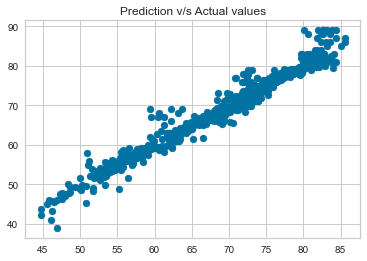

In [37]:
print("Prediction v/s Actual values")
plt.scatter(y_pred, y_test)
plt.title("Prediction v/s Actual values")

Prediction Error Plot


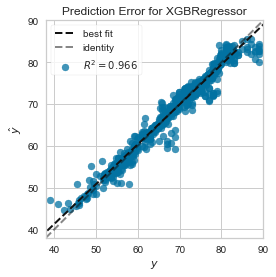

PredictionError(ax=<AxesSubplot:title={'center':'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>,
                estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=0.6, gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.019999999999999997,
                                       max_delta_step=0, max_depth=10,
                                       min_child_weight=4, missing=nan,
                                       monotone_constraints='()',
                                       n_estimators=650, n_jobs=8,
                                       num_parallel_tree=1, random_state=0,
                                       reg_alpha=0, reg_lambda=1,
                     

In [38]:
print("Prediction Error Plot")
print(prediction_error(xgb_regressor, x_train, y_train, x_test, y_test))

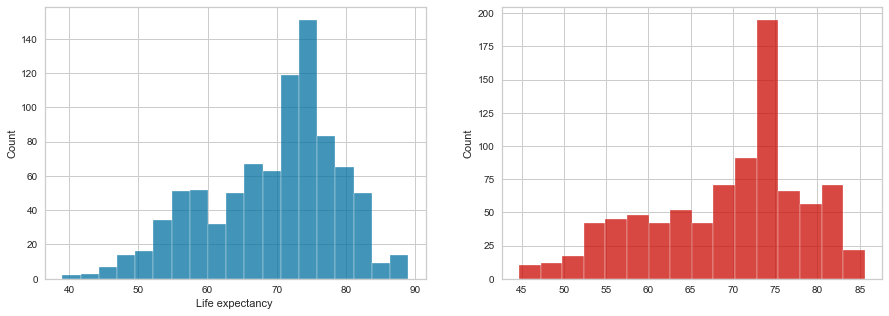

In [39]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(y_test)

plt.subplot(1,2,2)
sns.histplot(y_pred, color='r')

plt.show()

### Predictions using XGBoost Regression

#### - Feature List to give as input

In [40]:
feature_list = list(x.columns)
print("Number of Features = ", len(feature_list))
feature_list

Number of Features =  15


['Adult Mortality',
 'Income composition of resources',
 ' thinness  1-19 years',
 'Schooling',
 'Country',
 ' BMI ',
 ' HIV/AIDS',
 'infant deaths',
 'Alcohol',
 'Polio',
 'Diphtheria ',
 'percentage expenditure',
 'Total expenditure',
 'Hepatitis B',
 'Status']

#### - Input to model

In [41]:
def input_data():
    sc = StandardScaler()
    input_distionary = {}
    
    for i in feature_list:
        print("Enter ", i)
        input_distionary[i] = eval(input())
        
        data = pd.DataFrame(input_distionary, columns=feature_list, index=[0])
        data = sc.fit_transform(data)
        
        prediction = xgb_regressor.predict(data)
        return prediction